In [82]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

def regression_model(a,x):
    return a+x

x = torch.linspace(0, 10, M)
data = regression_model(torch.randn(M).to(dev) - 2, x)

w = torch.ones(N,dtype=torch.float).to(dev)
w = torch.nn.parameter.Parameter(w/w.sum())
l = torch.linspace(-6, 2, N, requires_grad=False).to(dev)

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -m[0].weights[index].log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])

def K(d):
        return 1/np.sqrt(2*np.pi)*np.exp(-d**2/2)
h=1.06*M**(-1/5)
kde_mat = K((regression_model(l, x.view(-1,1)) - data.view(-1,1)) / h)

a = torch.sum(kde_mat, dim=0)

def KDENLLLoss(m):
    return -(torch.matmul(kde_mat ,m[0].weights.view(-1,1))/(M*h)).log().sum()

Epoch: 0          Loss: 9044.5781  LR: 0.001000000
Epoch: 1          Loss: 9041.1924  LR: 0.001000000
Epoch: 2          Loss: 9037.8359  LR: 0.001000000
Epoch: 3          Loss: 9034.5107  LR: 0.001000000
Epoch: 4          Loss: 9031.2129  LR: 0.001000000
Epoch: 5          Loss: 9027.9443  LR: 0.001000000
Epoch: 6          Loss: 9024.7031  LR: 0.001000000
Epoch: 7          Loss: 9021.4893  LR: 0.001000000
Epoch: 8          Loss: 9018.3018  LR: 0.001000000
Epoch: 9          Loss: 9015.1416  LR: 0.001000000
Epoch: 10         Loss: 9012.0068  LR: 0.001000000
Epoch: 11         Loss: 9008.8984  LR: 0.001000000
Epoch: 12         Loss: 9005.8125  LR: 0.001000000
Epoch: 13         Loss: 9002.7539  LR: 0.001000000
Epoch: 14         Loss: 8999.7168  LR: 0.001000000
Epoch: 15         Loss: 8996.7041  LR: 0.001000000
Epoch: 16         Loss: 8993.7148  LR: 0.001000000
Epoch: 17         Loss: 8990.7480  LR: 0.001000000
Epoch: 18         Loss: 8987.8037  LR: 0.001000000
Epoch: 19         Loss: 8984.88

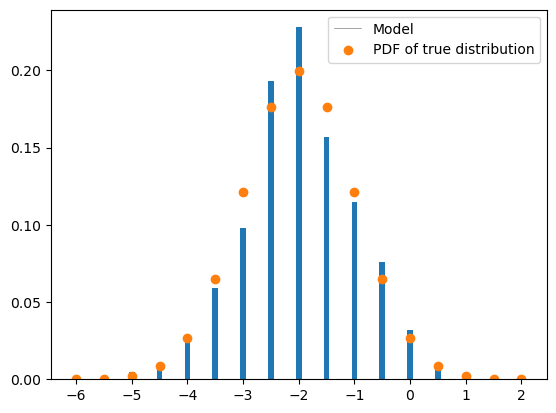

In [83]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-3)
opt.minimize(KDENLLLoss, verbose=True, print_freq=1, max_epochs=1000, tol_const=1e-2)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize


measure.visualize()
plt.scatter(xs, y, zorder=2)
plt.legend(['Model','PDF of true distribution'])
plt.show()


D:\OneDrive - Chalmers\År 3\Kandidatarbete\Python Git\Sergei\torch_measure.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.locations = torch.tensor(locations, dtype= torch.float)
D:\OneDrive - Chalmers\År 3\Kandidatarbete\Python Git\Sergei\torch_measure.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = nn.parameter.Parameter(torch.tensor(weights, dtype= torch.float))


Step 10: Goal function=8471.830078125, Learning rate= 0.03430000
Step 20: Goal function=8386.5537109375, Learning rate= 0.02401000
Step 30: Goal function=8362.62890625, Learning rate= 0.00576480
Step 40: Goal function=8353.150390625, Learning rate= 0.00403536
Step 50: Goal function=8347.7353515625, Learning rate= 0.00282475
Step 60: Goal function=8344.7216796875, Learning rate= 0.00197733
The value of the goal function has not changed!
Step 70: Goal function=8343.884765625, Learning rate= 0.00067822
Step 80: Goal function=8343.4375, Learning rate= 0.00047476
Step 90: Goal function=8342.9560546875, Learning rate= 0.00047476
Step 100: Goal function=8342.5107421875, Learning rate= 0.00047476
Step 110: Goal function=8342.107421875, Learning rate= 0.00047476
Step 120: Goal function=8341.736328125, Learning rate= 0.00047476
Step 130: Goal function=8341.41015625, Learning rate= 0.00047476
Step 140: Goal function=8341.1083984375, Learning rate= 0.00047476
Step 150: Goal function=8341.001953125

<BarContainer object of 17 artists>

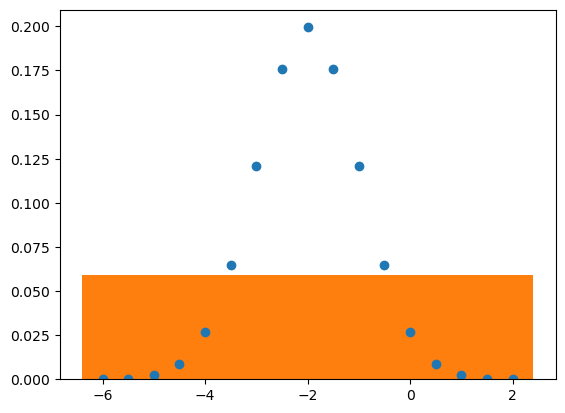

In [76]:
import Sergei.torch_measure as s

mes = s.TorchMeasure(l, w)
opt = s.MeasureMinimizer(mes, KDENLLLoss, learning_rate=1e-1)
opt.minimize()


plt.scatter(xs, y, zorder=2)
plt.bar(l, mes.weights.detach())